In [361]:
import scipy.optimize as fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Curve Fitting Guided Problem

1.1

In [364]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [365]:
df


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [366]:
df1 = df.iloc[ :, [0, 1, 3]]

In [367]:
df1

,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [368]:
sorted_df1 = df1.sort_values(by = 'dt')

In [369]:
sorted_df1

,dt,AverageTemperature,State
398686,1743-11-01,1.909,Nova Scotia
312139,1743-11-01,0.753,Michigan
447214,1743-11-01,0.665,Prince Edward Island
450453,1743-11-01,-0.526,Pskov
301925,1743-11-01,1.891,Massachusetts
...,...,...,...
552051,2013-09-01,26.408,Texas
594124,2013-09-01,NaN,Victoria
567074,2013-09-01,NaN,Tuva
261547,2013-09-01,NaN,Krasnoyarsk


In [370]:
sorted_df1.iloc[608802] #first data point after year 2000

dt                    2001-01-01
AverageTemperature        11.138
State                     Fujian
Name: 128950, dtype: object

In [371]:
data_after_2000 = sorted_df1.iloc[608802:645675]

In [372]:
data_after_2000

,dt,AverageTemperature,State
128950,2001-01-01,11.138,Fujian
501924,2001-01-01,26.953,Sergipe
195267,2001-01-01,2.836,Jiangsu
390884,2001-01-01,-8.209,North Dakota
513101,2001-01-01,-1.029,Sichuan
...,...,...,...
552051,2013-09-01,26.408,Texas
594124,2013-09-01,NaN,Victoria
567074,2013-09-01,NaN,Tuva
261547,2013-09-01,NaN,Krasnoyarsk


In [373]:
sorted_data_after_2000 = data_after_2000.sort_values(by = 'State')

In [374]:
sorted_data_after_2000

,dt,AverageTemperature,State
1796,2005-01-01,27.134,Acre
1835,2008-04-01,25.721,Acre
1802,2005-07-01,25.159,Acre
1887,2012-08-01,26.551,Acre
1751,2001-04-01,26.366,Acre
...,...,...,...
645645,2011-04-01,16.553,Zhejiang
645595,2007-02-01,10.586,Zhejiang
645594,2007-01-01,5.846,Zhejiang
645644,2011-03-01,9.895,Zhejiang


In [375]:
a = sorted_data_after_2000 #for ease

In [376]:
Three_states = a.loc[a['State'].isin( ['Wyoming', 'Nebraska', 'South Dakota'])]

In [377]:
Three_states

,dt,AverageTemperature,State
350895,2011-03-01,2.863,Nebraska
350775,2001-03-01,2.077,Nebraska
350866,2008-10-01,10.295,Nebraska
350799,2003-03-01,3.851,Nebraska
350918,2013-02-01,-1.816,Nebraska
...,...,...,...
626307,2002-09-01,13.073,Wyoming
626332,2004-10-01,6.485,Wyoming
626421,2012-03-01,4.259,Wyoming
626309,2002-11-01,-0.981,Wyoming


1.2

In [379]:
B = Three_states.groupby(['dt'])['AverageTemperature'].mean().reset_index()

In [380]:
B #Shortened name so I can use it easier later

,dt,AverageTemperature
0,2001-01-01,-4.480333
1,2001-02-01,-7.541000
2,2001-03-01,0.590333
3,2001-04-01,7.889000
4,2001-05-01,13.908667
...,...,...
148,2013-05-01,13.196000
149,2013-06-01,18.783667
150,2013-07-01,22.110333
151,2013-08-01,21.890000


1.3

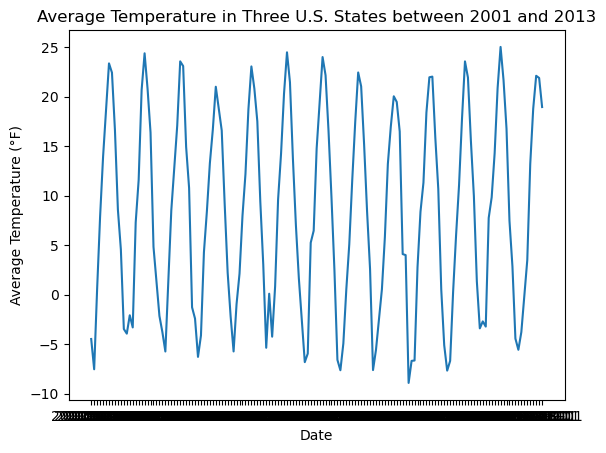

In [382]:
plt.figure()
x = B.loc[:, 'dt']
y = B.loc[:, 'AverageTemperature']
plt.title('Average Temperature in Three U.S. States between 2001 and 2013')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.plot(x, y)

1.4

I want to convert the dates to numbers where the smallest number corresponds to 2001-01-01 and the largest corresponds to 2013-09-01.
To do this, I could just make the date into an integer i.e. 2001-01-01 --> 20010101 since this will be smaller than 20130901 and all dates in between.

In [385]:
B['dt'].dtype

dtype('O')

In [386]:
C = B['dt'].str.replace('-', '').astype(int)

In [387]:
C

0      20010101
1      20010201
2      20010301
3      20010401
4      20010501
         ...   
148    20130501
149    20130601
150    20130701
151    20130801
152    20130901
Name: dt, Length: 153, dtype: int32

This worked to change the dates from strings to integers like I wanted but I need to preserve the dataframe. Maybe I can try replacing the colum with this.

In [389]:
New_df = B.copy() #Use a substitute variable so I dont mess with other B uses

In [390]:
New_df['dt'] = C

In [391]:
New_df

,dt,AverageTemperature
0,20010101,-4.480333
1,20010201,-7.541000
2,20010301,0.590333
3,20010401,7.889000
4,20010501,13.908667
...,...,...
148,20130501,13.196000
149,20130601,18.783667
150,20130701,22.110333
151,20130801,21.890000


In [392]:
B

,dt,AverageTemperature
0,2001-01-01,-4.480333
1,2001-02-01,-7.541000
2,2001-03-01,0.590333
3,2001-04-01,7.889000
4,2001-05-01,13.908667
...,...,...
148,2013-05-01,13.196000
149,2013-06-01,18.783667
150,2013-07-01,22.110333
151,2013-08-01,21.890000


The copy worked and now I have the data frame I desired.

1.5

The data when plotted looks like a sine wave so I will use that as my model equation.

In [396]:
def f(x, A, w, c):
    return A*np.sin(w*x + c)

My sine wave is amplified by about 30 (One peak is at 25 and then the subsequent trough is at -5), its frequency looks like about 6 (tested in desmos), and it is shifted right by about 4 (also tested in desmos).

In [398]:
p0 = [30, 6, 4] 

1.6

In [400]:
params, cov = fit.curve_fit(f, New_df['dt'], New_df['AverageTemperature'], p0)

In [457]:
params

array([30.,  6.,  4.])

In [401]:
A = params[0]
w = params[1]
c = params[2]

y_est = f(New_df['dt'], A, w, c)

1.7

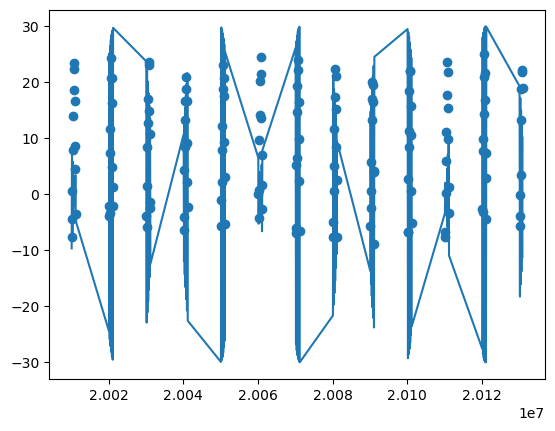

In [403]:
plt.figure()
plt.plot(New_df['dt'], y_est) #plots our estimated graph
plt.scatter(New_df['dt'], New_df['AverageTemperature']) #plots our actual data points
plt.show()

1.8

In [405]:
cov

array([[ 1.21354493e+06,  2.95967634e-03, -3.22755894e+04],
       [ 2.95967634e-03,  7.21831090e-12, -7.87164437e-05],
       [-3.22755894e+04, -7.87164437e-05,  8.58419819e+02]])

In [406]:
err1 = np.sqrt(cov[0,0])
err2 = np.sqrt(cov[1,1])
err3 = np.sqrt(cov[2,2])

In [407]:
err1

1101.6101525020194

In [408]:
err2

2.686691441854473e-06

In [409]:
err3

29.29880235054119

1.9

In [411]:
parameter_1 = 30

print(f"parameter_1 = {parameter_1} \u00B1 {err1}")


parameter_1 = 30 ± 1101.6101525020194


In [412]:
parameter_2 = 6

print(f"parameter_2 = {parameter_2} \u00B1 {err2}")

parameter_2 = 6 ± 2.686691441854473e-06


In [413]:
parameter_3 = 4

print(f"parameter_3 = {parameter_3} \u00B1 {err2}")

parameter_3 = 4 ± 2.686691441854473e-06


1.10

In [415]:
from astropy.table import Table
DF =Table.read('global_CCl4_MM.dat', format = 'ascii', comment = '#')

In [416]:
Df = DF.to_pandas()

In [417]:
Df

,CCl4ottoyr,CCl4ottomon,CCl4ottoNHm,CCl4ottoNHsd,CCl4ottoSHm,CCl4ottoSHsd,CCl4ottoGLm,CCl4ottoGLsd
0,1996,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,2,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,4,105.318,0.197,102.969,0.238,104.144,0.155
4,1996,5,105.032,0.193,102.754,0.287,103.893,0.174
...,...,...,...,...,...,...,...,...
283,2019,8,NaN,NaN,NaN,NaN,NaN,NaN
284,2019,9,NaN,NaN,NaN,NaN,NaN,NaN
285,2019,10,NaN,NaN,NaN,NaN,NaN,NaN
286,2019,11,NaN,NaN,NaN,NaN,NaN,NaN


In [418]:
CCldf = Df.rename(columns={
    'CCl4ottoyr': 'year',
    'CCl4ottomon': 'month',
    'CCl4ottoNHm': 'NH_mean',
    'CCl4ottoNHsd': 'NH_sd',
    'CCl4ottoSHm': 'SH_mean',
    'CCl4ottoSHsd': 'SH_sd',
    'CCl4ottoGLm': 'GL_mean',
    'CCl4ottoGLsd': 'GL_sd'
})


In [420]:
CCldf['time'] = CCldf['year'] + (CCldf['month'] - 1)/12

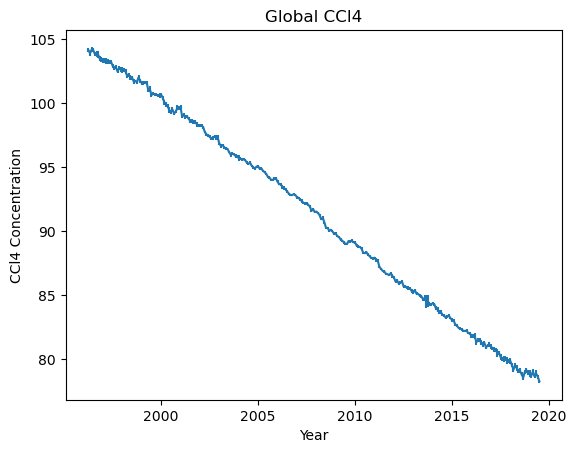

In [424]:
plt.errorbar(CCldf['time'], CCldf['GL_mean'], yerr =CCldf['GL_sd'])
plt.xlabel('Year')
plt.ylabel('CCl4 Concentration')
plt.title('Global CCl4')
plt.show()

In [428]:
def y(x, m, b):
    return m*x + b

In [436]:
df_clean = CCldf.dropna().copy()

In [438]:
p_0 = [-1, 105]
params1, cov1 = fit.curve_fit(y, df_clean['time'], df_clean['GL_mean'], p_0)

In [440]:
params1

array([-1.14604322e+00,  2.39240437e+03])

In [442]:
m = params1[0]
b = params1[1]
y_est1 = y(df_clean['time'], m, b)

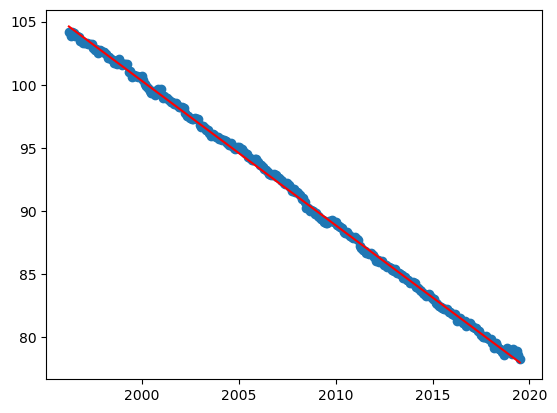

In [446]:
plt.figure()
plt.plot(df_clean['time'], y_est1, color = 'r') 
plt.scatter(df_clean['time'], df_clean['GL_mean'])
plt.show()

In [450]:
y_expected = y(df_clean['time'], m, b)


In [463]:
chi = sum((df_clean['GL_mean'] - y_expected)**2/(df_clean['GL_sd']**2))
chi

1280.6870662227498

In [461]:
err01 = np.sqrt(cov1[0,0])
err02 = np.sqrt(cov1[1,1])
parameter1 = params1[0]
parameter2 = params1[1]


In [473]:
print(f"parameter 1 = {parameter1} \u00B1 {err01}")
print(f"parameter 2 = {parameter2} \u00B1 {err02}")
print(f"y = -x + 105")
print(f"reduced chi-squared = {chi}")

parameter 1 = -1.146043218073998 ± 0.0022042444385245645
parameter 2 = 2392.4043657760426 ± 4.425872250923912
y = -x + 105
reduced chi-squared = 1280.6870662227498


A linear model does seem appropriate since visually it fits right along our data points.